<a href="https://colab.research.google.com/github/FajarKKP/CodingPractice/blob/main/Fashion_mnist_intro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.__version__)

2.4.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(tr_img,tr_label),(ts_img,ts_label) =mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss')<0.2):
      print("Reached 80%, good enough. Stopping training")
      self.model.stop_training= True

callbacks = myCallback()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

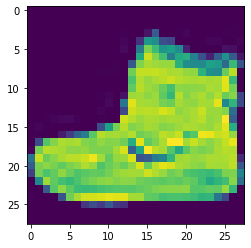

In [5]:
plt.imshow(tr_img[0])
print(tr_label[0])
print(tr_img[0])

In [6]:
tr_img = tr_img/255
ts_tmg = ts_img/255

In [7]:
model = tf.keras.models.Sequential([
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation=tf.nn.relu),
                          tf.keras.layers.Dense(256, activation=tf.nn.relu),
                          tf.keras.layers.Dense(10,activation=tf.nn.softmax),
])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(tr_img,tr_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2722 - accuracy: 0.8992
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2476 - accuracy: 0.9058
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2355 - accuracy: 0.9115
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2231 - accuracy: 0.9146
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2209 - accuracy: 0.9142


In [30]:
ls, acc = model.evaluate(ts_img, ts_label)
print(acc)

ValueError: ignored

In [29]:
# Now with Convolution
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2902 - accuracy: 0.9119
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0314 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0180 - accuracy: 0.9946
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0121 - accuracy: 0.9963
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0040 - accuracy: 0.9988